### Read files

In [3]:
import glob, re
import numpy as np
import pandas as pd
#from sklearn import *
from datetime import datetime

data = {
    #visitors
    'tra': pd.read_csv('./input/air_visit_data.csv',parse_dates=["visit_date"]),
    #reservations
    'ar': pd.read_csv('./input/air_reserve.csv',parse_dates=["visit_datetime","reserve_datetime"]),
    'hr': pd.read_csv('./input/hpg_reserve.csv',parse_dates=["visit_datetime","reserve_datetime"]),
    #store info
    'as': pd.read_csv('./input/air_store_info.csv'),
    'hs': pd.read_csv('./input/hpg_store_info.csv'),
    #air<->hpg
    'id': pd.read_csv('./input/store_id_relation.csv'),
    #days
    'hol': pd.read_csv('./input/date_info.csv',parse_dates=["calendar_date"]), #.rename(columns={'calendar_date':'visit_date'})
    #
    'tes': pd.read_csv('./input/sample_submission.csv'),
    }

### Some data categorizing to reduce space

In [4]:
import sys
data["tra"]["air_store_id"]=data["tra"]["air_store_id"].astype('category')
total=0
for k,v in data.items():
    size_k=sys.getsizeof(data[k])/1024/1024
    total+=size_k
    print(k,size_k)
print("total",total)

id 0.022129058837890625
as 0.23502159118652344
ar 8.898050308227539
hol 0.039612770080566406
hr 192.67313385009766
tra 4.42775821685791
tes 2.9315261840820312
hs 1.3301172256469727
total 210.5573492050171


In [5]:
data["tra"]["air_store_id"]=data["tra"]["air_store_id"].astype('category')
data["as"]["air_store_id"]=data["as"]["air_store_id"].astype('category')
data["as"]["air_genre_name"]=data["as"]["air_genre_name"].astype('category')
data["as"]["air_area_name"]=data["as"]["air_area_name"].astype('category')
data["hs"]["hpg_store_id"]=data["hs"]["hpg_store_id"].astype('category')
data["hs"]["hpg_genre_name"]=data["hs"]["hpg_genre_name"].astype('category')
data["hs"]["hpg_area_name"]=data["hs"]["hpg_area_name"].astype('category')
data["ar"]["air_store_id"]=data["ar"]["air_store_id"].astype('category')
data["hr"]["hpg_store_id"]=data["hr"]["hpg_store_id"].astype('category')
data["id"]["hpg_store_id"]=data["id"]["hpg_store_id"].astype('category')
data["id"]["air_store_id"]=data["id"]["air_store_id"].astype('category')
data["hol"]["day_of_week"]=data["hol"]["day_of_week"].astype('category')
data["hol"]["holiday_flg"]=data["hol"]["holiday_flg"].astype('category')

In [6]:
total=0
for k,v in data.items():
    size_k=sys.getsizeof(data[k])/1024/1024
    total+=size_k
    print(k,size_k)
print("total",total)

id 0.032466888427734375
as 0.13867950439453125
ar 2.323484420776367
hol 0.005854606628417969
hr 51.20259189605713
tra 4.42775821685791
tes 2.9315261840820312
hs 0.6168069839477539
total 61.679168701171875


### test

In [7]:
data["tes"][["store_id","time"]]=data["tes"]["id"].str.split("_2017",expand=True)
data["tes"]["time"]="2017"+data["tes"]["time"]
from dateutil import parser
data["tes"]["time"] = pd.to_datetime(data["tes"]["time"])

In [8]:
print(data["tes"].dtypes)
data["tes"].head(5)


id                  object
visitors             int64
store_id            object
time        datetime64[ns]
dtype: object


,id,visitors,store_id,time
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27


In [9]:
len(data["tes"].store_id.unique())

821

### ---

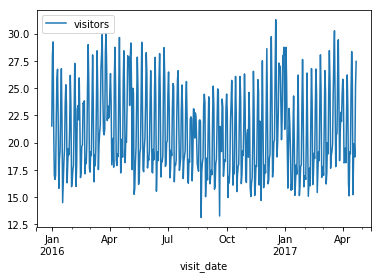

In [10]:
%matplotlib inline
data["tra"].groupby("visit_date").mean().plot()

Join dataframes 

In [11]:
data["tra_as_hol"]=data["tra"].merge(data["hol"],left_on="visit_date",right_on="calendar_date").drop("calendar_date",axis=1).\
            merge(data["as"],on="air_store_id")

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


In [12]:
data["tra_as_hol"].describe(include="all")

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
count,252108,252108,252108.000000,252108,252108.0,252108,252108,252108.000000,252108.000000
unique,829,478,NaN,7,2.0,14,103,NaN,NaN
top,air_5c817ef28f236bdf,2017-03-17 00:00:00,NaN,Friday,0.0,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,NaN,NaN
freq,477,799,NaN,40351,239333.0,62052,19775,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-04-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,20.973761,NaN,NaN,NaN,NaN,35.613121,137.357865
std,NaN,NaN,16.757007,NaN,NaN,NaN,NaN,2.044473,3.671577
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,33.211967,130.195555
25%,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,34.692337,135.341564


In [13]:
data["tra_as_hol"].head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


One-hot encoding for day of week, holiday, genre, area

In [40]:
#cols_to_enc=["holiday_flg","air_genre_name","air_area_name","day_of_week"]
cols_to_enc=["holiday_flg","day_of_week"]
dummies=pd.get_dummies(data["tra_as_hol"][cols_to_enc])
#data["tra_as_hol"].join(dummies)
enc=data["tra_as_hol"].join(dummies)
#enc.describe()
enc=enc.drop(cols_to_enc,axis=1).drop(["latitude","longitude"],axis=1)
enc.head()
for c in enc.columns: print(c)
print(len(enc.columns))
#print(enc.columns)

air_store_id
visit_date
visitors
air_genre_name
air_area_name
holiday_flg_0
holiday_flg_1
day_of_week_Friday
day_of_week_Monday
day_of_week_Saturday
day_of_week_Sunday
day_of_week_Thursday
day_of_week_Tuesday
day_of_week_Wednesday
14


Divide train-test before-after

In [41]:
cut_date='2017-3-1'
df_train=enc[enc["visit_date"]<cut_date]
df_test= enc[enc["visit_date"]>= cut_date]

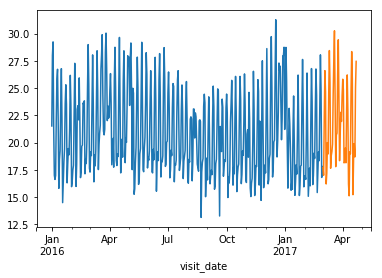

In [42]:
df_train.groupby("visit_date")["visitors"].mean().plot()
df_test.groupby("visit_date")["visitors"].mean().plot()

In [43]:
print(
len(data["tra_as_hol"]["air_area_name"].unique()),
len(data["tra_as_hol"]["longitude"].unique()),
len(data["tra_as_hol"]["latitude"].unique()),
)
print(
len(data["tra_as_hol"].groupby(['latitude', 'longitude']).size()),
len(data["tra_as_hol"].groupby(["air_area_name",'latitude', 'longitude']).size())
)

103 108 108
108 108


In [44]:
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5

In [55]:
X_test

array([['air_ba937bf13d40fb24', Timestamp('2017-03-01 00:00:00'),
        'Dining bar', ..., 0, 0, 1],
       ['air_ba937bf13d40fb24', Timestamp('2017-03-02 00:00:00'),
        'Dining bar', ..., 1, 0, 0],
       ['air_ba937bf13d40fb24', Timestamp('2017-03-03 00:00:00'),
        'Dining bar', ..., 0, 0, 0],
       ..., 
       ['air_a17f0778617c76e2', Timestamp('2017-03-26 00:00:00'),
        'Italian/French', ..., 0, 0, 0],
       ['air_a17f0778617c76e2', Timestamp('2017-03-20 00:00:00'),
        'Italian/French', ..., 0, 0, 0],
       ['air_a17f0778617c76e2', Timestamp('2017-04-09 00:00:00'),
        'Italian/French', ..., 0, 0, 0]], dtype=object)

For each store I use day and holiday as predictors

In [105]:
error=0
n_pred=0
#pred_df=pd.DataFrame()
pred_y_tot={}
for i,store in enumerate(df_train["air_store_id"].unique()):
    df_store_train=df_train[df_train["air_store_id"]==store].drop(["visit_date", "air_store_id",'air_genre_name', 'air_area_name'],axis=1)
    df_store_test =df_test [df_test["air_store_id"]==store].drop(["visit_date", "air_store_id",'air_genre_name', 'air_area_name'],axis=1)
    if (i==0):print(df_store.columns)
    print(i)
    X_train = df_store_train.drop(["visitors"],axis=1).values
    X_test =  df_store_test.drop(["visitors"],axis=1).values
    # Split the targets into training/testing sets
    y_train = df_store_train["visitors"].values
    y_test =  df_store_test["visitors"].values
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    try:
        y_pred = regr.predict(X_test)
    except:
        continue
    #print(len(y_pred),len(y_test))
    #df_store_test["visitors_predicted"]=y_pred
    #pred_df=pred_df.append(df_test)
    pred_y_tot[store]=[y_test,y_pred]
    error+=metrics.mean_squared_error(y_test, y_pred)
    print(metrics.mean_squared_error(y_test, y_pred))
    n_pred+=1

Index(['visitors', 'holiday_flg_0', 'holiday_flg_1', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')
0
84.1792490434
1
18.2001953125
2
138.596467391
3
47.8418367347
4
69.6971066497
5
114.419642857
6
21.5015857625
7
131.660768995
8
49.4712837838
9
181.127358491
10
166.358490566
11
357.38
12
48.3842773438
13
17.617369186
14
70.934921875
15
51.8830672554
16
58.2390280331
17
189.096742021
18
89.1765182783
19
385.705555556
20
194.903094952
21
103.082361558
22
204.296875
23
153.45990566
24
207.526988636
25
78.1898716518
26
81.7777777778
27
65.8670929553
28
61.94921875
29
46.32804318
30
204.211956522
31
100.273584906
32
323.938322754
33
60.9083059211
34
527.406005859
35
245.866666667
36
25.8070091392
37
26.3200733418
38
40.56640625
39
11.1288260666
40
172.394357639
41
69.9118387474
42
519.176063232
43
168.30626922
44
96.9656575521
45
219.814094

88.97578125
461
20.056376321
462
15.2757994186
463
57.0652777778
464
71.8365885417
465
90.6626805719
466
149.489888652
467
55.2042151163
468
1.79937147107e+28
469
237.010174419
470
67.6698369565
471
98.5074573864
472
66.9709302326
473
538.588347739
474
51.8152173913
475
8.60326086957
476
20.3589048529
477
8.11785350126
478
53.6762971698
479
373.672169811
480
13.1223383885
481
23.1333333333
482
13.4655250727
483
143.515869141
484
133.25
485
49.7886904762
486
70.9166666667
487
82.6872051887
488
115.73820613
489
19.6456367925
490
80.0725972877
491
53.5435267857
492
14.6652715774
493
51.5990691489
494
77.9280354818
495
65.5325029481
496
27.4877929688
497
63.1824372944
498
60.3233695652
499
61.7497766373
500
19.5203804348
501
123.526293485
502
9.40329318576
503
28.3016304348
504
48.5186508641
505
7.48481396094e+30
506
57.6050531915
507
35.4633144163
508
164.397222222
509
41.882472618
510
34.7004716981
511
174.183423913
512
19.8765625
513
1.89744366793e+27
514
249.549278846
515
32.4791666667

In [114]:
#len(pred_y_tot)
#np.sqrt(error/n_pred)


error=0
n_pred=0
for s in pred_y_tot.values():
    y_test=s[0]
    y_pred=s[1]
#    error+=(metrics.mean_squared_error(y_test, y_pred))
    error+=((y_test-y_pred)**2).sum()
    n_pred+=len(y_test)
np.sqrt(error/n_pred)

27933323545765.844

In [86]:
df_store_test[["visitors","visitors_predicted"]]
df_test[["visitors","visitors_predicted"]]

KeyError: "['visitors_predicted'] not in index"

In [66]:
df_train.columns

Index(['air_store_id', 'visit_date', 'visitors', 'air_genre_name',
       'air_area_name', 'holiday_flg_0', 'holiday_flg_1', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [47]:
X_train = df_train.drop(["visitors","visit_date"],axis=1).values
X_test =  df_test.drop(["visitors","visit_date"],axis=1).values
# Split the targets into training/testing sets
y_train = df_train["visitors"].values
y_test =  df_test["visitors"].values

In [28]:
y_train

array([25, 32, 29, ..., 19, 35,  5])

In [29]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

MemoryError: 

In [32]:
X_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)